In [1]:
!source .env
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
from tqdm import tqdm
import numpy as np
import torch 
from hidden import *
from accelerate_predict import CertaintyEstimator


# read tsv of the data
data = pd.read_csv('liar_dataset/data_with_responses.tsv', sep='\t')
# Load the certainty estimator
certainty_estimator = CertaintyEstimator()
estimator = CertaintyEstimator('sentence-level')
subs = data['substring_after_assistant'].tolist()
certainty_scores = estimator.predict(subs, tqdm=tqdm)
# add the column
data['certainty_score'] = certainty_scores
data.head()


/bin/bash: line 1: .env: No such file or directory


/home/mila/s/shahrad.mohammadzadeh/projects/assertivity/.venv/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:769: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/home/mila/s/shahrad.mohammadzadeh/projects/assertivity/.venv/lib/python3.10/site-packages/transformers/models/auto/auto_factory.py:468: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/home/mila/s/shahrad.mohammadzadeh/projects/assertivity/.venv/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py:769: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/home/mila/s/shahrad.mohammadzadeh/projects/assertivity/.venv/lib/python3.10/site-packages/transformers/models/auto/auto_factory.py:468: F

,id,label,statement,subject,speaker,job,state,party,barely_true,false,half_true,mostly_true,pants_on_fire,venue,full_response,substring_after_assistant,certainty_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,"user\n\nGiven a statement, predict if is true ...",False.\n\nThe statement is false because Ann &...,4.956542
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"user\n\nGiven a statement, predict if is true ...",False.\n\nThe statement is false because the d...,4.957538
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,"user\n\nGiven a statement, predict if is true ...",False.\n\nHillary Clinton did not vote to give...,4.970032
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,"user\n\nGiven a statement, predict if is true ...",False.\n\nThe statement is false because there...,4.950550
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"user\n\nGiven a statement, predict if is true ...",False.\n\nThe statement is false because it is...,4.471704


In [7]:
# save the data
data.to_csv('liar_dataset/data_with_responses_and_certainty.tsv', sep='\t', index=False)


/bin/bash: line 1: .env: No such file or directory


<Axes: >

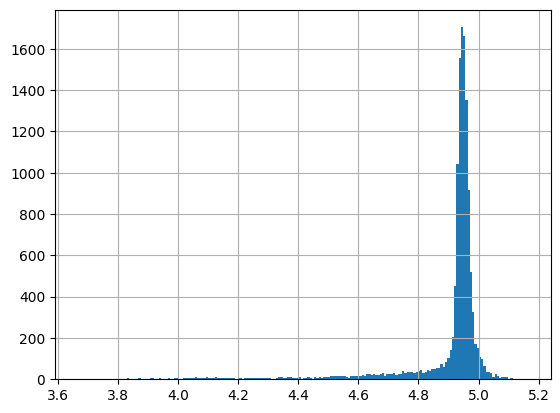

In [2]:
!source .env
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
from tqdm import tqdm
import numpy as np
import torch 
from hidden import *
from accelerate_predict import CertaintyEstimator

df = pd.read_csv('liar_dataset/data_with_responses_and_certainty.tsv', sep='\t')
# plot the histogram of the certainty_score s
df['certainty_score'].hist(bins=200)


In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['certainty_score'], bins=50, color='blue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Certainty Scores')
plt.xlabel('Certainty Score')
plt.ylabel('Frequency')

# Show plot
plt.show()